In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('authors_affiliations_dataset.csv')

author_count_by_affiliation = df.groupby('affiliation').size().reset_index(name='Author Count')

author_count_by_affiliation = author_count_by_affiliation.sort_values('Author Count', ascending=False)

print(author_count_by_affiliation)

                               affiliation  Author Count
48                         Google Research            24
59                                     IBM            23
47                                  Google            21
88                                    Meta            16
151               University of Washington            10
..                                     ...           ...
56   Health Research Authority, London, UK             1
54     Harrison.ai, Sydney, NSW, Australia             1
53                               Graphcore             1
52          Google, Mountain View, CA, USA             1
159            metaLAB, Harvard University             1

[160 rows x 2 columns]


In [3]:
df = pd.read_csv('authors_affiliations_dataset.csv')

author_count_detailed = df.groupby(['affiliation', 'affiliation_type']).size().reset_index(name='Author Count')

author_count_detailed = author_count_detailed.sort_values('Author Count', ascending=False)

print(author_count_detailed)

print(f"\nTotal unique affiliations: {df['affiliation'].nunique()}")
print(f"\nAuthor count by affiliation type:")
print(df.groupby('affiliation_type').size())

                               affiliation affiliation_type  Author Count
48                         Google Research         Industry            24
59                                     IBM         Industry            23
47                                  Google         Industry            21
88                                    Meta         Industry            16
153               University of Washington         Academia            10
..                                     ...              ...           ...
56   Health Research Authority, London, UK       Government             1
54     Harrison.ai, Sydney, NSW, Australia         Industry             1
53                               Graphcore         Industry             1
52          Google, Mountain View, CA, USA         Industry             1
161            metaLAB, Harvard University         Academia             1

[162 rows x 3 columns]

Total unique affiliations: 160

Author count by affiliation type:
affiliation_type
Acad

In [4]:
affiliation_type_counts = df['affiliation_type'].value_counts()
print("Author counts by affiliation type:")
print(affiliation_type_counts)
print()

total_authors = len(df)
print(f"Total authors: {total_authors}")
print()

proportions = df['affiliation_type'].value_counts(normalize=True) * 100
print("Proportions by affiliation type (%):")
print(proportions)
print()

academia_count = len(df[df['affiliation_type'] == 'Academia'])
industry_count = len(df[df['affiliation_type'] == 'Industry'])

print(f"Academia authors: {academia_count} ({academia_count/total_authors*100:.2f}%)")
print(f"Industry authors: {industry_count} ({industry_count/total_authors*100:.2f}%)")
print()

# Calculate the ratio Academia / Industry
if industry_count > 0:
    ratio = academia_count / industry_count
    print(f"Academia to Industry ratio: {ratio:.2f}:1")
    print(f"This means for every 1 industry author, there are {ratio:.2f} academia authors")
else:
    print("No industry authors found")

Author counts by affiliation type:
affiliation_type
Academia          180
Industry          139
Government         20
Non-for-profit     13
Other               1
Name: count, dtype: int64

Total authors: 353

Proportions by affiliation type (%):
affiliation_type
Academia          50.991501
Industry          39.376771
Government         5.665722
Non-for-profit     3.682720
Other              0.283286
Name: proportion, dtype: float64

Academia authors: 180 (50.99%)
Industry authors: 139 (39.38%)

Academia to Industry ratio: 1.29:1
This means for every 1 industry author, there are 1.29 academia authors


                  Count  Percentage
affiliation_type                   
Academia            180   50.991501
Industry            139   39.376771
Government           20    5.665722
Non-for-profit       13    3.682720
Other                 1    0.283286

Academia: 180 authors (50.99%)
Industry: 139 authors (39.38%)
Academia to Industry ratio: 1.29:1


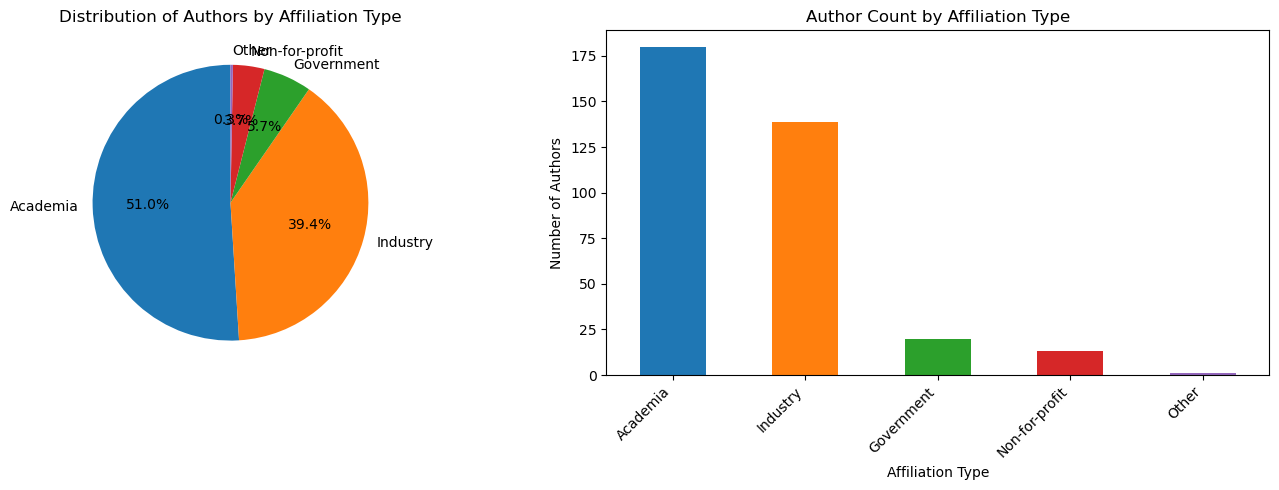

In [5]:
# Create a comprehensive comparison
affiliation_counts = df['affiliation_type'].value_counts()
affiliation_proportions = df['affiliation_type'].value_counts(normalize=True) * 100

# Create a summary DataFrame
summary = pd.DataFrame({
    'Count': affiliation_counts,
    'Percentage': affiliation_proportions
})

print(summary)
print()

academia_count = len(df[df['affiliation_type'] == 'Academia'])
industry_count = len(df[df['affiliation_type'] == 'Industry'])
total_authors = len(df)

print(f"Academia: {academia_count} authors ({academia_count/total_authors*100:.2f}%)")
print(f"Industry: {industry_count} authors ({industry_count/total_authors*100:.2f}%)")
print(f"Academia to Industry ratio: {academia_count/industry_count:.2f}:1")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].pie(affiliation_counts, labels=affiliation_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Authors by Affiliation Type')

affiliation_counts.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
axes[1].set_title('Author Count by Affiliation Type')
axes[1].set_xlabel('Affiliation Type')
axes[1].set_ylabel('Number of Authors')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
print("=" * 80)
print("BASIC STATISTICS")
print("=" * 80)

total_authors = len(df)
print(f"Total author entries: {total_authors}")

affiliation_counts = df['affiliation_type'].value_counts()
print("\nUnweighted author counts by affiliation type:")
print(affiliation_counts)
print()

unweighted_proportions = df['affiliation_type'].value_counts(normalize=True) * 100
print("Unweighted proportions (%):")
for aff_type, prop in unweighted_proportions.items():
    print(f"  {aff_type}: {prop:.2f}%")

print("\n" + "=" * 80)
print("WEIGHTED ANALYSIS BY PAPER")
print("=" * 80)

#  Weighted proportions 
paper_weights = []

for paper_name, paper_df in df.groupby('paper'):
    total_authors_in_paper = len(paper_df)

    type_counts = paper_df['affiliation_type'].value_counts()

    for aff_type, count in type_counts.items():
        proportion_in_paper = count / total_authors_in_paper
        paper_weights.append({
            'paper': paper_name,
            'affiliation_type': aff_type,
            'count': count,
            'total_authors': total_authors_in_paper,
            'proportion': proportion_in_paper
        })

paper_weights_df = pd.DataFrame(paper_weights)

# Each paper contributes equally (weight = 1/number_of_papers)
weighted_proportions = paper_weights_df.groupby('affiliation_type')['proportion'].mean() * 100

print("\nWeighted proportions by paper (each paper weighted equally):")
for aff_type, prop in weighted_proportions.sort_values(ascending=False).items():
    print(f"  {aff_type}: {prop:.2f}%")

print("\n" + "=" * 80)
print("ACADEMIA vs INDUSTRY COMPARISON")
print("=" * 80)

academia_unweighted = affiliation_counts.get('Academia', 0)
industry_unweighted = affiliation_counts.get('Industry', 0)

academia_weighted = weighted_proportions.get('Academia', 0)
industry_weighted = weighted_proportions.get('Industry', 0)

print("\nUNWEIGHTED (counting all author entries):")
print(f"  Academia: {academia_unweighted} authors ({academia_unweighted/total_authors*100:.2f}%)")
print(f"  Industry: {industry_unweighted} authors ({industry_unweighted/total_authors*100:.2f}%)")
if industry_unweighted > 0:
    print(f"  Ratio Academia:Industry = {academia_unweighted/industry_unweighted:.2f}:1")

print("\nWEIGHTED (averaging proportions across papers):")
print(f"  Academia: {academia_weighted:.2f}%")
print(f"  Industry: {industry_weighted:.2f}%")
if industry_weighted > 0:
    print(f"  Ratio Academia:Industry = {academia_weighted/industry_weighted:.2f}:1")

print("\n" + "=" * 80)
print("PAPER-LEVEL DETAILS")
print("=" * 80)

papers_by_type = paper_weights_df.groupby('affiliation_type')['paper'].nunique()
total_papers = df['paper'].nunique()

print(f"\nTotal papers in dataset: {total_papers}")
print("\nNumber of papers with at least one author from each affiliation type:")
for aff_type, count in papers_by_type.sort_values(ascending=False).items():
    print(f"  {aff_type}: {count} papers ({count/total_papers*100:.2f}%)")

print("\nPapers with authors from multiple affiliation types:")
papers_with_mixed = df.groupby('paper')['affiliation_type'].nunique()
mixed_papers = papers_with_mixed[papers_with_mixed > 1]
print(f"  {len(mixed_papers)} papers ({len(mixed_papers)/total_papers*100:.2f}%)")

print("\nExamples of papers with both Academia and Industry authors:")
academia_industry_papers = []
for paper_name, paper_df in df.groupby('paper'):
    types = set(paper_df['affiliation_type'].unique())
    if 'Academia' in types and 'Industry' in types:
        academia_count = len(paper_df[paper_df['affiliation_type'] == 'Academia'])
        industry_count = len(paper_df[paper_df['affiliation_type'] == 'Industry'])
        academia_industry_papers.append({
            'paper': paper_name,
            'academia_authors': academia_count,
            'industry_authors': industry_count,
            'total_authors': len(paper_df)
        })

mixed_df = pd.DataFrame(academia_industry_papers)
if len(mixed_df) > 0:
    print(f"\nFound {len(mixed_df)} papers with both Academia and Industry authors")
    print("\nFirst 5 examples:")
    print(mixed_df.head())

BASIC STATISTICS
Total author entries: 353

Unweighted author counts by affiliation type:
affiliation_type
Academia          180
Industry          139
Government         20
Non-for-profit     13
Other               1
Name: count, dtype: int64

Unweighted proportions (%):
  Academia: 50.99%
  Industry: 39.38%
  Government: 5.67%
  Non-for-profit: 3.68%
  Other: 0.28%

WEIGHTED ANALYSIS BY PAPER

Weighted proportions by paper (each paper weighted equally):
  Academia: 79.49%
  Industry: 69.93%
  Non-for-profit: 28.81%
  Government: 25.79%
  Other: 1.96%

ACADEMIA vs INDUSTRY COMPARISON

UNWEIGHTED (counting all author entries):
  Academia: 180 authors (50.99%)
  Industry: 139 authors (39.38%)
  Ratio Academia:Industry = 1.29:1

WEIGHTED (averaging proportions across papers):
  Academia: 79.49%
  Industry: 69.93%
  Ratio Academia:Industry = 1.14:1

PAPER-LEVEL DETAILS

Total papers in dataset: 59

Number of papers with at least one author from each affiliation type:
  Academia: 46 papers 

COLLABORATION ANALYSIS: ACADEMIA-INDUSTRY PAPERS

Total papers in dataset: 59

--------------------------------------------------------------------------------
SUMMARY
--------------------------------------------------------------------------------
Papers with BOTH Academia AND Industry authors: 15 (25.42%)
Papers with ONLY Academia authors: 31 (52.54%)
Papers with ONLY Industry authors: 12 (20.34%)
Papers with NEITHER Academia nor Industry: 1 (1.69%)

--------------------------------------------------------------------------------
COLLABORATION PAPERS DETAILS
--------------------------------------------------------------------------------

Total authors in collaboration papers: 168
  Academia authors: 78 (46.43%)
  Industry authors: 63 (37.50%)
  Other authors: 27 (16.07%)

Average authors per collaboration paper:
  Total authors: 11.20 (median: 7)
  Academia authors: 5.20 (median: 4)
  Industry authors: 4.20 (median: 3)

Ratio of Academia to Industry in collaboration papers:
  Averag

/var/folders/49/91yrrd4d6nj4tq89k9gjr9jh0000gp/T/ipykernel_88454/41375017.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(box_data, labels=['Academia\nAuthors', 'Industry\nAuthors', 'Total\nAuthors'])


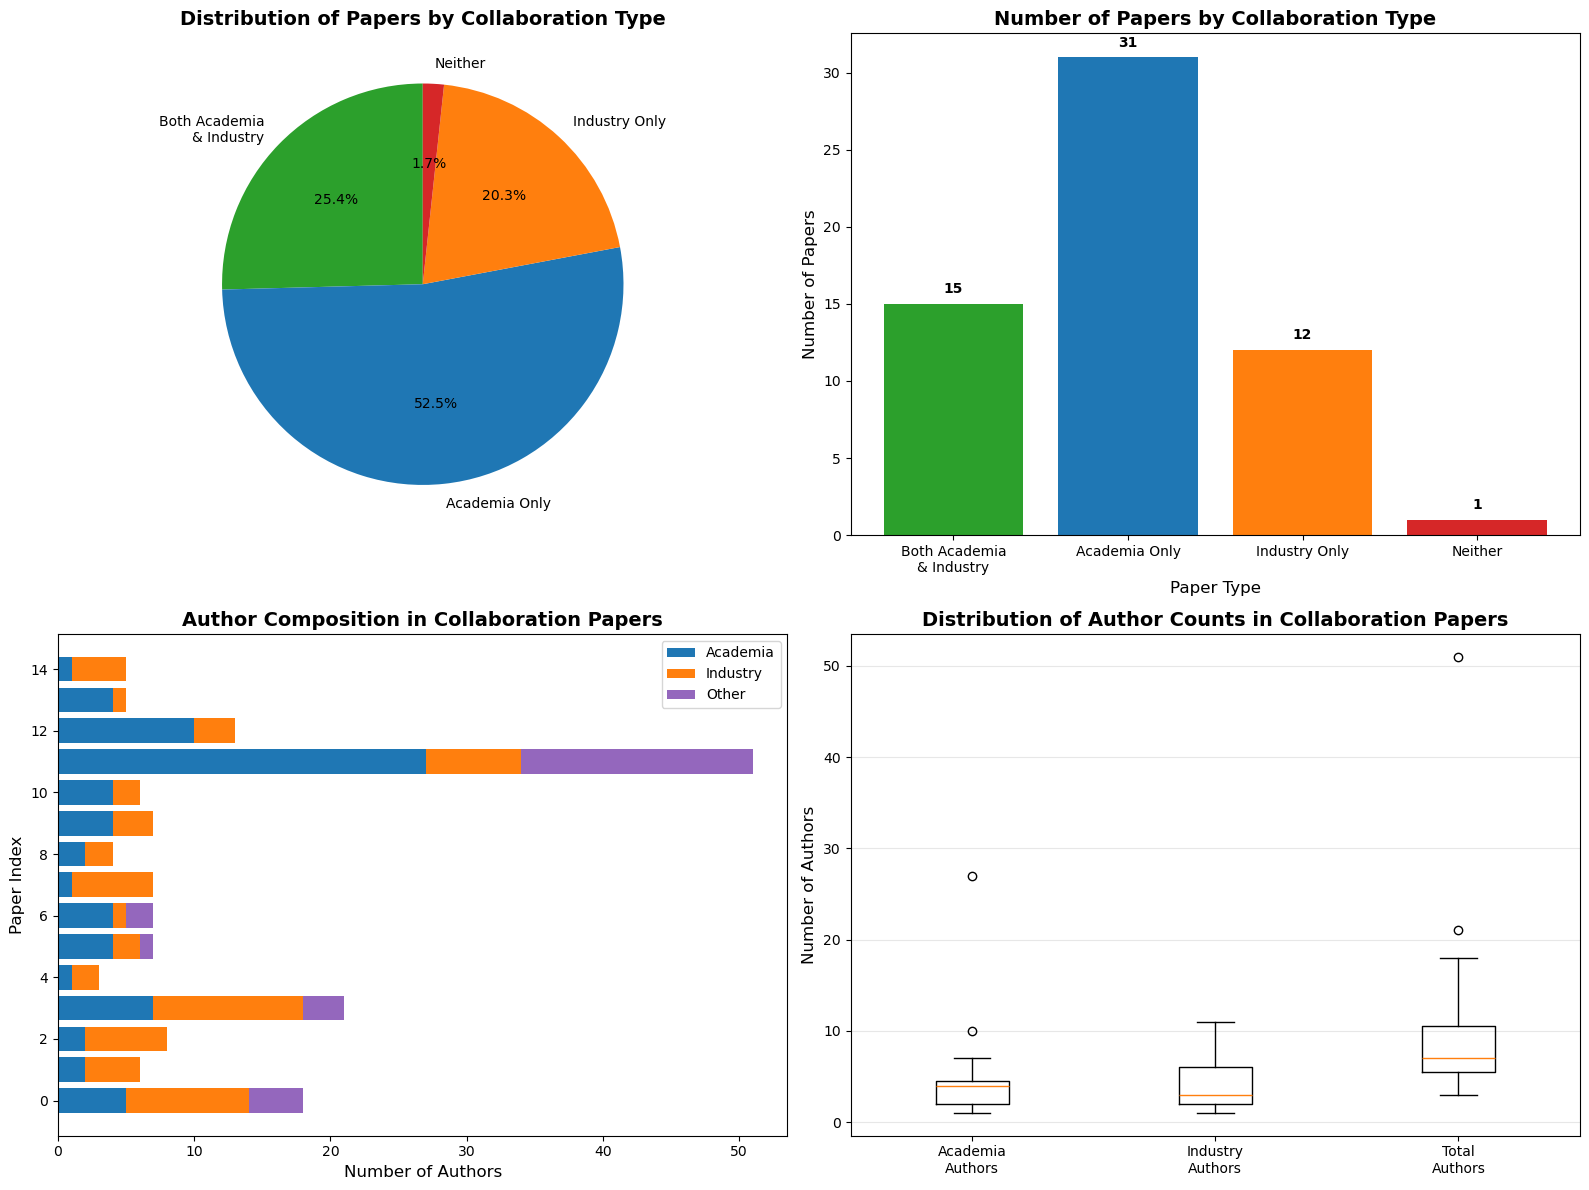

In [4]:
# Analysis of papers with both Academia and Industry authors

print("=" * 80)
print("COLLABORATION ANALYSIS: ACADEMIA-INDUSTRY PAPERS")
print("=" * 80)

# Get total papers
total_papers = df['paper'].nunique()
print(f"\nTotal papers in dataset: {total_papers}")

# Identify papers with both Academia and Industry authors
academia_industry_papers = []
academia_only_papers = []
industry_only_papers = []
neither_papers = []

for paper_name, paper_df in df.groupby('paper'):
    types = set(paper_df['affiliation_type'].unique())

    has_academia = 'Academia' in types
    has_industry = 'Industry' in types

    if has_academia and has_industry:
        academia_count = len(paper_df[paper_df['affiliation_type'] == 'Academia'])
        industry_count = len(paper_df[paper_df['affiliation_type'] == 'Industry'])
        total_count = len(paper_df)

        academia_industry_papers.append({
            'paper': paper_name,
            'academia_authors': academia_count,
            'industry_authors': industry_count,
            'other_authors': total_count - academia_count - industry_count,
            'total_authors': total_count,
            'academia_percentage': (academia_count / total_count) * 100,
            'industry_percentage': (industry_count / total_count) * 100
        })
    elif has_academia and not has_industry:
        academia_only_papers.append(paper_name)
    elif has_industry and not has_academia:
        industry_only_papers.append(paper_name)
    else:
        neither_papers.append(paper_name)

# Summary statistics
print("\n" + "-" * 80)
print("SUMMARY")
print("-" * 80)
print(f"Papers with BOTH Academia AND Industry authors: {len(academia_industry_papers)} ({len(academia_industry_papers)/total_papers*100:.2f}%)")
print(f"Papers with ONLY Academia authors: {len(academia_only_papers)} ({len(academia_only_papers)/total_papers*100:.2f}%)")
print(f"Papers with ONLY Industry authors: {len(industry_only_papers)} ({len(industry_only_papers)/total_papers*100:.2f}%)")
print(f"Papers with NEITHER Academia nor Industry: {len(neither_papers)} ({len(neither_papers)/total_papers*100:.2f}%)")

# Detailed analysis of collaboration papers
if len(academia_industry_papers) > 0:
    collab_df = pd.DataFrame(academia_industry_papers)

    print("\n" + "-" * 80)
    print("COLLABORATION PAPERS DETAILS")
    print("-" * 80)

    print(f"\nTotal authors in collaboration papers: {collab_df['total_authors'].sum()}")
    print(f"  Academia authors: {collab_df['academia_authors'].sum()} ({collab_df['academia_authors'].sum()/collab_df['total_authors'].sum()*100:.2f}%)")
    print(f"  Industry authors: {collab_df['industry_authors'].sum()} ({collab_df['industry_authors'].sum()/collab_df['total_authors'].sum()*100:.2f}%)")
    print(f"  Other authors: {collab_df['other_authors'].sum()} ({collab_df['other_authors'].sum()/collab_df['total_authors'].sum()*100:.2f}%)")

    print("\nAverage authors per collaboration paper:")
    print(f"  Total authors: {collab_df['total_authors'].mean():.2f} (median: {collab_df['total_authors'].median():.0f})")
    print(f"  Academia authors: {collab_df['academia_authors'].mean():.2f} (median: {collab_df['academia_authors'].median():.0f})")
    print(f"  Industry authors: {collab_df['industry_authors'].mean():.2f} (median: {collab_df['industry_authors'].median():.0f})")

    print("\nRatio of Academia to Industry in collaboration papers:")
    print(f"  Average ratio: {collab_df['academia_authors'].sum() / collab_df['industry_authors'].sum():.2f}:1")

    print("\n" + "-" * 80)
    print("ALL COLLABORATION PAPERS")
    print("-" * 80)
    print(collab_df.to_string(index=False))

else:
    print("\nNo papers found with both Academia and Industry authors")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Pie chart: Paper categories
categories = ['Both Academia\n& Industry', 'Academia Only', 'Industry Only', 'Neither']
counts = [len(academia_industry_papers), len(academia_only_papers), len(industry_only_papers), len(neither_papers)]
colors = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728']

axes[0, 0].pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0, 0].set_title('Distribution of Papers by Collaboration Type', fontsize=14, fontweight='bold')

# Bar chart: Paper counts
axes[0, 1].bar(categories, counts, color=colors)
axes[0, 1].set_title('Number of Papers by Collaboration Type', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Number of Papers', fontsize=12)
axes[0, 1].set_xlabel('Paper Type', fontsize=12)
for i, v in enumerate(counts):
    axes[0, 1].text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# Distribution of authors in collaboration papers
if len(academia_industry_papers) > 0:
    collab_df = pd.DataFrame(academia_industry_papers)

    # Stacked bar chart for each collaboration paper
    paper_indices = range(len(collab_df))

    axes[1, 0].barh(paper_indices, collab_df['academia_authors'], label='Academia', color='#1f77b4')
    axes[1, 0].barh(paper_indices, collab_df['industry_authors'],
                    left=collab_df['academia_authors'], label='Industry', color='#ff7f0e')
    axes[1, 0].barh(paper_indices, collab_df['other_authors'],
                    left=collab_df['academia_authors'] + collab_df['industry_authors'],
                    label='Other', color='#9467bd')

    axes[1, 0].set_xlabel('Number of Authors', fontsize=12)
    axes[1, 0].set_ylabel('Paper Index', fontsize=12)
    axes[1, 0].set_title('Author Composition in Collaboration Papers', fontsize=14, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].set_yticks(paper_indices[::2])  # Show every other tick to avoid crowding

    # Box plot: Distribution of author counts
    box_data = [collab_df['academia_authors'], collab_df['industry_authors'], collab_df['total_authors']]
    axes[1, 1].boxplot(box_data, labels=['Academia\nAuthors', 'Industry\nAuthors', 'Total\nAuthors'])
    axes[1, 1].set_title('Distribution of Author Counts in Collaboration Papers', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Number of Authors', fontsize=12)
    axes[1, 1].grid(axis='y', alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'No collaboration papers found',
                    ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 1].text(0.5, 0.5, 'No collaboration papers found',
                    ha='center', va='center', transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)